
<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Subsurface Data Analytics 

## Basic Plotting of Subsurface Data


### Michael Pyrcz, Associate Professor, University of Texas at Austin 

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)


### PGE 383 Exercise: Basic Data Plotting in Python with GeostatsPy

Here's a simple workflow with some basic plotting of tabular and gridded data. This should help you get started data visualization and interpretation.

#### Objective 

In the PGE 383: Stochastic Subsurface Modeling class I want to provide hands-on experience with building subsurface modeling workflows. Python provides an excellent vehicle to accomplish this. I have coded a package called GeostatsPy with GSLIB: Geostatistical Library (Deutsch and Journel, 1998) functionality that provides basic building blocks for building subsurface modeling workflows. 

The objective is to remove the hurdles of subsurface modeling workflow construction by providing building blocks and sufficient examples. This is not a coding class per se, but we need the ability to 'script' workflows working with numerical methods.    

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

You will need to copy the data files to your working directory.  They are avaiable here:

1. Tabular data - sample_data.csv at https://git.io/fh4gm
2. Gridded data - AI_grid.csv at https://git.io/fh4gU

There are exampled below with these functions. You can go here to see a list of the available functions, https://git.io/fh4eX, other example workflows and source code. 

In [113]:
import geostatspy.GSLIB as GSLIB          # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats    # GSLIB methods convert to Python        

We will also need some standard packages. These should have been installed with Anaconda 3.

In [114]:
import numpy as np                        # ndarrys for gridded data
import pandas as pd                       # DataFrames for tabular data
import os                                 # set working directory, run executables
import matplotlib.pyplot as plt           # for plotting

You can get a list of all the functions available by doing a 'dir' on the package.  This provides (often) a very long list, but it may be helpful to job your memory.

In [119]:
dir(pd)

['Categorical',
 'CategoricalIndex',
 'DataFrame',
 'DateOffset',
 'DatetimeIndex',
 'ExcelFile',
 'ExcelWriter',
 'Expr',
 'Float64Index',
 'Grouper',
 'HDFStore',
 'Index',
 'IndexSlice',
 'Int64Index',
 'Interval',
 'IntervalIndex',
 'MultiIndex',
 'NaT',
 'Panel',
 'Period',
 'PeriodIndex',
 'RangeIndex',
 'Series',
 'SparseArray',
 'SparseDataFrame',
 'SparseSeries',
 'Term',
 'TimeGrouper',
 'Timedelta',
 'TimedeltaIndex',
 'Timestamp',
 'UInt64Index',
 'WidePanel',
 '_DeprecatedModule',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_hashtable',
 '_lib',
 '_libs',
 '_np_version_under1p10',
 '_np_version_under1p11',
 '_np_version_under1p12',
 '_np_version_under1p13',
 '_np_version_under1p14',
 '_np_version_under1p15',
 '_tslib',
 '_version',
 'api',
 'bdate_range',
 'compat',
 'concat',
 'core',
 'crosstab',
 'cut',
 'date_range',
 'datetime',
 'datetools',
 'descri

I find it helpful to visit the package docs.  

For example the pandas' package has great docs right [here](https://pandas.pydata.org/pandas-docs/stable/). For the command to load a comma delimited file, [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) is the documentation.

* You can see the command.
* You can see all of the possible parameters, the default values and the descriptions of the parameters.

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). 

In [6]:
os.chdir("c:/PGE383")             # set the working directory

#### Loading Tabular Data

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object.  For fun try misspelling the name. You will get an ugly, long error.  

In [14]:
df = pd.read_csv('null.csv')     # load our data table (wrong name!)

FileNotFoundError: File b'null.csv' does not exist

That's Python, but there's method to the madness. In general the error shows a trace from the initial command into all the nested programs involved until the actual error occured. If you are debugging code (I know, I'm getting ahead of myself now), this is valuable for the detective work of figuring out what went wrong. I've spent days in C++ debugging one issue, this helps. So since you're working in Jupyter Notebook, the program just assumes you code. Fine. If you scroll to the bottom of the error you often get a summary statement *FileNotFoundError: File b'sample_data_cow.csv' does not exist*. Ok, now you know that you don't have a file iwth that name in the working directory.  

Painful to leave that error in our workflow, eh? Everytime I passes it while making this documented I wanted to fix it. Its a coder thing... go ahead and erase it if you like. Just select the block and click on the scissors above in the top bar of this window. While we are at it, notice if you click the '+' you can add in a new block anywhere. Ok, let's spell the file name correctly and get back to work, already.

In [63]:
df = pd.read_csv('12_sample_data.csv')     # load our data table (wrong name!)
df = df.sample(frac=.30, random_state = 73073); df = df.reset_index()

No error now! It worked, we loaded our file into our DataFrame called 'df'. But how do you really know that it worked? Visualizing the DataFrame would be useful and we already leard about these methods in this demo (https://git.io/fNgRW). 

We can preview the DataFrame by printing a slice or by utilizing the 'head' DataFrame member function (with a nice and clean format, see below). With the slice we could look at any subset of the data table and with the head command, add parameter 'n=13' to see the first 13 rows of the dataset.  

In [64]:
print(df.iloc[0:5,:])                   # display first 4 samples in the table as a preview
df.head(n=13)                           # we could also use this command for a table preview

   index    X    Y  Facies  Porosity         Perm           AI
0     72  250   50       0  0.139637     0.347182  4747.274043
1    153  650  750       0  0.170732    10.720560  4535.625583
2    258   80  669       1  0.244345  3222.716042  2696.102930
3     56  200  150       0  0.167125     3.042590  5500.997419
4    303   60  929       1  0.216253   400.298484  3959.934912


,index,X,Y,Facies,Porosity,Perm,AI
0,72,250,50,0,0.139637,0.347182,4747.274043
1,153,650,750,0,0.170732,10.720560,4535.625583
2,258,80,669,1,0.244345,3222.716042,2696.102930
3,56,200,150,0,0.167125,3.042590,5500.997419
4,303,60,929,1,0.216253,400.298484,3959.934912
5,374,750,699,0,0.159171,9.224292,5263.064063
6,333,340,549,0,0.170881,84.471492,2918.232227
7,1,50,850,1,0.237154,39.837129,3074.562617
8,54,200,250,1,0.188043,57.804784,4997.078597
9,311,250,579,1,0.215039,625.510541,2693.691341


#### Summary Statistics fort Tabular Data

The table includes X and Y coordinates (meters), Facies 1 and 2 (1 is sandstone and 0 interbedded sand and mudstone), Porosity (fraction), permeability as Perm (mDarcy) and acoustic impedance as AI (kg/m^3 x m/s*10^3). 

Let's make some basic spatial plots. What is the range of the coordinates and the properties? We will need to know this. Let's get the summary statistics.  

In [65]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,144.0,261.048611,136.830267,1.000000,144.750000,270.000000,381.250000,478.000000
X,144.0,449.375000,263.691435,0.000000,242.500000,400.000000,650.000000,980.000000
Y,144.0,542.979167,289.228936,19.000000,300.000000,579.000000,800.000000,979.000000
Facies,144.0,0.659722,0.475456,0.000000,0.000000,1.000000,1.000000,1.000000
Porosity,144.0,0.190700,0.031972,0.131230,0.166621,0.188733,0.217234,0.256172
Perm,144.0,510.036736,1136.459068,0.039555,6.950509,56.886770,356.658709,7452.343369
AI,144.0,3746.825725,793.196589,1961.600397,3167.631744,3668.526774,4244.264532,6194.573653


Now we could type them or use commands. like this one:
```p
df['Porosity'].min()
```
to calculate the property ranges. It is natural to set the ranges manually. e.g. do you want your color bar to go from 0.05887 to 0.24230 exactly? Also, let's pick a color map for display. I heard that plasma is known to be friendly to the color blind as the color and intensity vary together (hope I got that right, it was an interesting Twitter conversation started by Matt Hall from Agile if I recall correctly). We will assume a study area of 0 to 1,000m in x and y and omit any data outside this area.

In [66]:
xmin = 0.0; xmax = 1000.0               # range of x values
ymin = 0.0; ymax = 1000.0               # range of y values
pormin = 0.04; pormax = 0.20;             # range of porosity values
cmap = plt.cm.plasma                    # color map

#### Visualizing Tabular Data with Location Maps

Let's try out locmap. This is a reimplementation of GSLIB's locmap program that uses matplotlib. I hope you find it simpler than matplotlib, if you want to get more advanced and build custom plots lock at the source. If you improve it, send me the new code. Any help is appreciated. To see the parameters, just type the command name:

In [67]:
GSLIB.locmap

<function geostatspy.GSLIB.locmap(df, xcol, ycol, vcol, xmin, xmax, ymin, ymax, vmin, vmax, title, xlabel, ylabel, vlabel, cmap, fig_name)>

Let's add the parmaters.

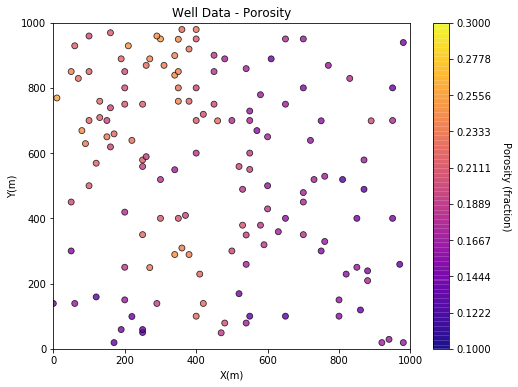

In [68]:
GSLIB.locmap(df,'X','Y','Porosity',xmin,xmax,ymin,ymax,0.1,.3,'Well Data - Porosity','X(m)','Y(m)','Porosity (fraction)',cmap,'locmap_Porosity')

Not too bad, eh. Was it useful to plot that data? Spatial data needs to always be considered in a spatial context. 

Looks like a regular sampled data set with 2 densely sampled study areas and some other samples mixed in.

Also, look at the property continuity and trends.  We will talk more about these concepts soon.

Maybe we can tighten up the color bar to see more details?

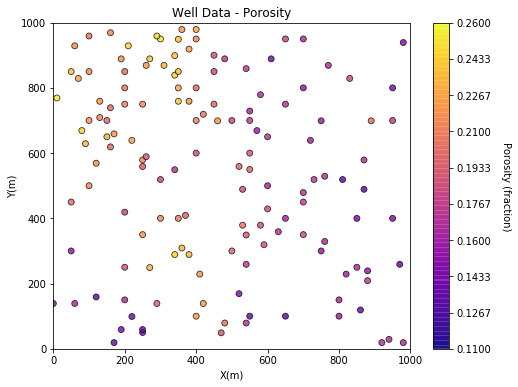

In [69]:
GSLIB.locmap(df,'X','Y','Porosity',xmin,xmax,ymin,ymax,0.11,0.26,'Well Data - Porosity','X(m)','Y(m)','Porosity (fraction)',cmap,'locmap_Porosity_new_color')

The new colorbar extents improves the resolution of spatial details for our property. 

We will need ranges for the other variables. I'll pick some:

In [70]:
permmin = 0.01; permmax = 3000;
AImin = 1000.0; AImax = 8000
Fmin = 0; Fmax = 1

Let's add the other properties into a composite figure with all the plots as subplots. To do this we use the subplot command, in matplotlib package to prior to the figure command to indicate that the following figure is part of a subplot and we use subplots_adjust at the end to get the scaling right. We can save our fancy figure to an image file with the file format and resolution that we need. This is great for writing reports, papers and making great looking update presentations. In GeostatsPy, I provide additional ploting methods with '_st' in the name to 'stack' images in a composite figure. The parameters are the same except there is no fig_name (figure name for the saved file) at the end as we don't want to save each subplot.

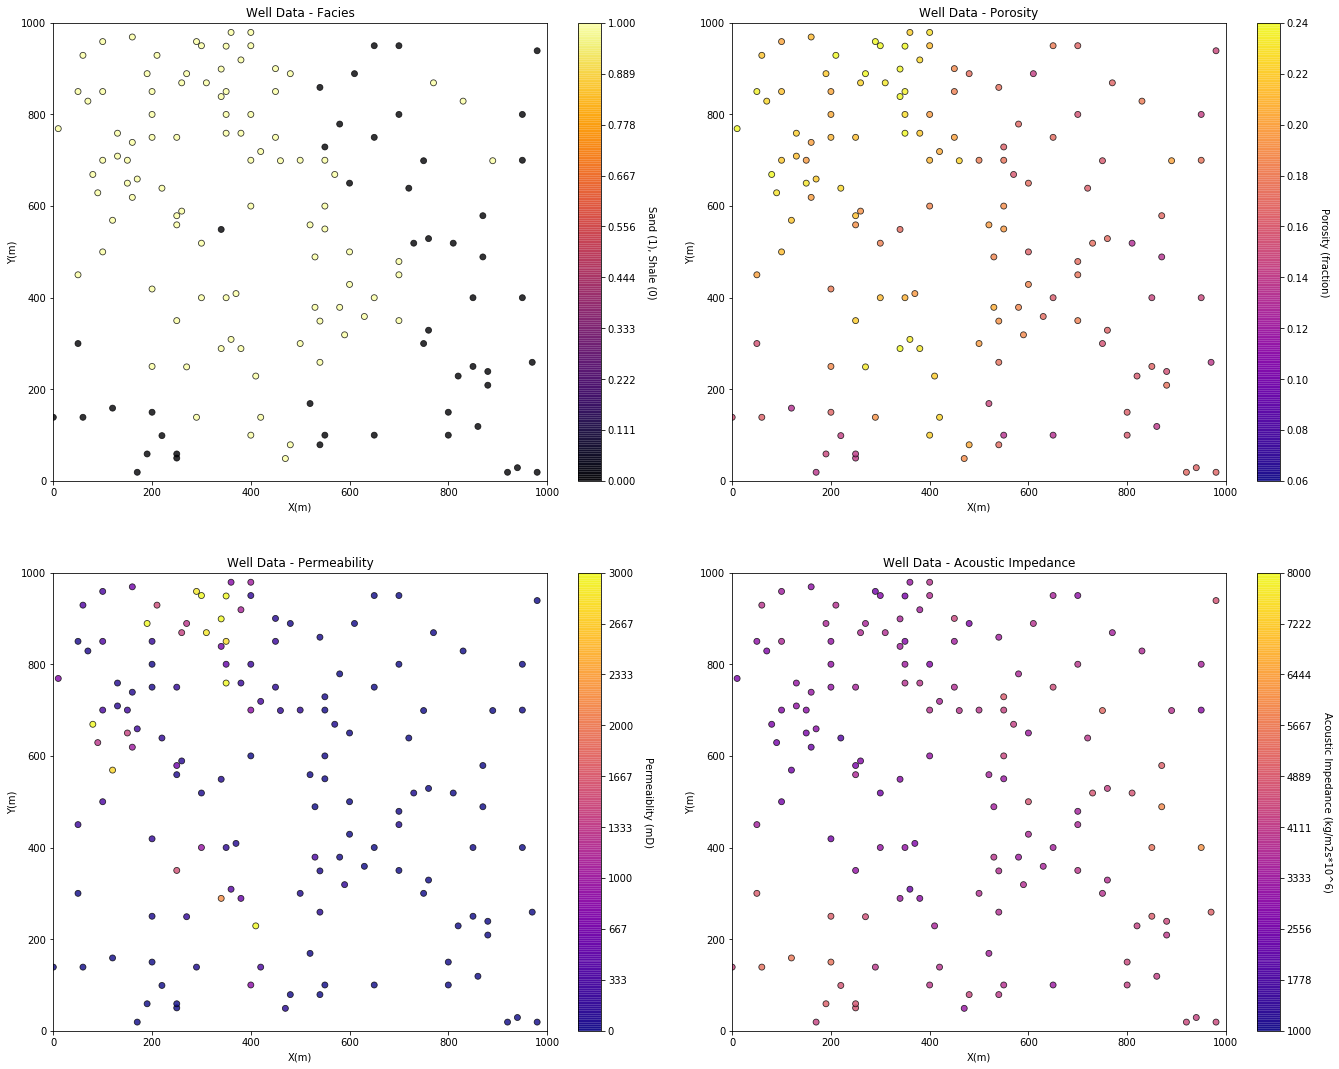

In [71]:
plt.subplot(221)
GSLIB.locmap_st(df,'X','Y','Facies',xmin,xmax,ymin,ymax,Fmin,Fmax,'Well Data - Facies','X(m)','Y(m)','Sand (1), Shale (0)',plt.cm.inferno)

plt.subplot(222)
GSLIB.locmap_st(df,'X','Y','Porosity',xmin,xmax,ymin,ymax,0.06,0.24,'Well Data - Porosity','X(m)','Y(m)','Porosity (fraction)',cmap)

plt.subplot(223)
GSLIB.locmap_st(df,'X','Y','Perm',xmin,xmax,ymin,ymax,permmin,permmax,'Well Data - Permeability','X(m)','Y(m)','Permeaiblity (mD)',cmap)

plt.subplot(224)
GSLIB.locmap_st(df,'X','Y','AI',xmin,xmax,ymin,ymax,AImin,AImax,'Well Data - Acoustic Impedance','X(m)','Y(m)','Acoustic Impedance (kg/m2s*10^6)',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=3.5, wspace=0.1, hspace=0.2)
plt.savefig('All_location_maps.tif',dpi=600,bbox_inches="tight")
plt.show()

Looks pretty good eh? Did you notice that I used inferno color map for facies? I just thought blue would not be a great color for shale and 'inferno' is pretty cool.

#### Data Transformations

Permeability has a strong positive skew / potentially lognormal distribution. Let's perform the log transform to improve the interpretability of the data.

In [86]:
df['logPerm'] = np.log10(df['Perm'].values)

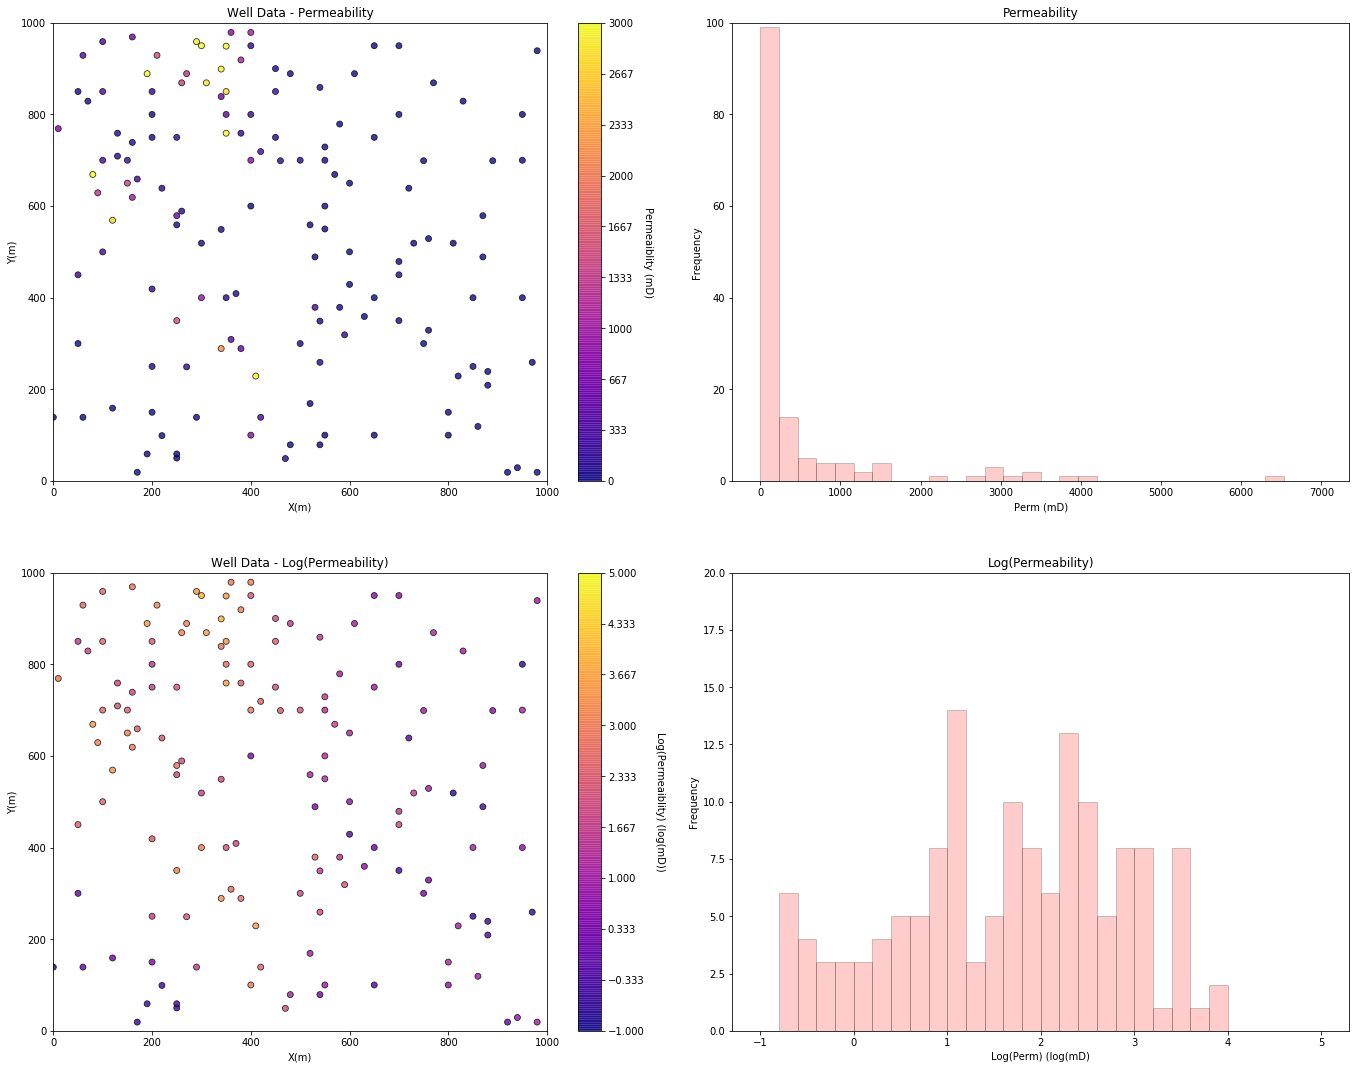

In [94]:
plt.subplot(221)
GSLIB.locmap_st(df,'X','Y','Perm',xmin,xmax,ymin,ymax,permmin,permmax,'Well Data - Permeability','X(m)','Y(m)','Permeaiblity (mD)',cmap)

plt.subplot(222)
GSLIB.hist_st(df['Perm'],0.0,7000,False,False,30,None,"Perm (mD)","Permeability")
plt.ylim(0.0,100)

plt.subplot(223)
GSLIB.locmap_st(df,'X','Y','logPerm',xmin,xmax,ymin,ymax,-1,5,'Well Data - Log(Permeability)','X(m)','Y(m)','Log(Permeaiblity) (log(mD))',cmap)

plt.subplot(224)
GSLIB.hist_st(df['logPerm'],-1,5,False,False,30,None,"Log(Perm) (log(mD)","Log(Permeability)")
plt.ylim(0.0,20)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=3.5, wspace=0.1, hspace=0.2)
plt.savefig('All_location_maps.tif',dpi=600,bbox_inches="tight")
plt.show()

#### Loading Gridded Data

Let's load and visualize the seismic data set.

In [101]:
seismic = np.loadtxt(open("12_AI.csv", "rb"), delimiter=",")

Once again, no errors, a good sign. Let's see what we loaded. 

In [102]:
seismic

array([[2533.88411965, 2394.78844564, 3190.23811052, ..., 4790.1473788 ,
        4938.2651136 , 5767.83234538],
       [3410.80188769, 3332.28652952, 2920.84106359, ..., 4718.10321317,
        4687.60324279, 5366.89655662],
       [3413.93007127, 3122.65470818, 3165.10983075, ..., 4571.87949876,
        4761.73382479, 5101.28972654],
       ...,
       [5481.00285812, 4566.41671063, 4844.56047183, ..., 4386.33791583,
        4869.916299  , 3984.28940954],
       [5461.13876074, 4673.12397734, 4673.46120902, ..., 3797.13493789,
        4443.05424623, 4837.20002239],
       [4666.5963451 , 4280.36960363, 4687.97413979, ..., 3461.51663097,
        3933.29016965, 4128.18118906]])

It is an array. Good!  

Let's get more specific. We can use the 'type' command to find out what any object is and we can use the shape member of ndarray to get the size of the array (ny, nx).

In [103]:
print('The object type is ' + str(type(seismic)))
print('  with size ' + str(seismic.shape))

The object type is <class 'numpy.ndarray'>
  with size (100, 100)


#### Visualizing Gridded Data

We have a 100 in y and 100 in x grid but we need more information. What is the origin, units, orientation and the cell size? This file format does not include that information so I'll give it to you. It is the same for any of the datasets that I prepared for this course. The cell size is 10m isotropic and grid goes from 0 to 1000m in x and y (origin is at 0,0 and the orientation is alligned with x and y (Eastings and Northings, no rotation).

In [104]:
xmin = 0.0; xmax = 1000.0               # range of x values
ymin = 0.0; ymax = 1000.0               # range of y values
gcsize = 10.0;                          # grid cell size

We will use the pixelplt command reimplimented form GSLIB. To see the parameters type the name and run.

In [105]:
GSLIB.pixelplt

<function geostatspy.GSLIB.pixelplt(array, xmin, xmax, ymin, ymax, step, vmin, vmax, title, xlabel, ylabel, vlabel, cmap, fig_name)>

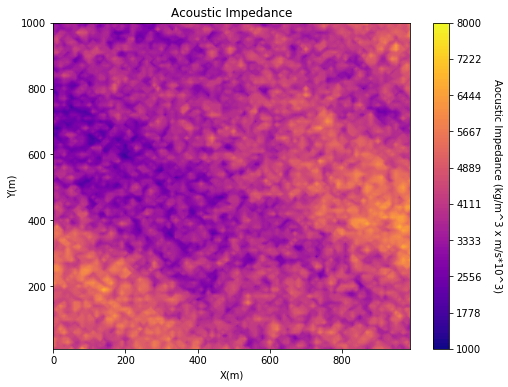

In [111]:
GSLIB.pixelplt(seismic,xmin,xmax,ymin,ymax,gcsize,AImin,AImax,'Acoustic Impedance','X(m)','Y(m)','Aocustic Impedance (kg/m^3 x m/s*10^3)',cmap,'pixelplot_Acoustic_Impedance')

Interesting, there are a lot of local variations in our subsurface unit in acoustic impedance. If acoustic impedance is well correlated to petrophysical properties then there is a lot of good information here.

#### Visualizing Tabular and Gridded Data Together

You may be concerned about the consistency between the acoustic impedance samples and the grid. It is a good check to plot them together. locpix is a program that I 'added' to my version of GSLIB as a PhD student to do this. I coded a lot of custom GSLIB in Fortran during my PhD, this is the only custom function that I included as I didn't want to confuse folks accustomed to GSLIB or using GSLIB documentation.

In [107]:
GSLIB.locpix

<function geostatspy.GSLIB.locpix(array, xmin, xmax, ymin, ymax, step, vmin, vmax, df, xcol, ycol, vcol, title, xlabel, ylabel, vlabel, cmap, fig_name)>

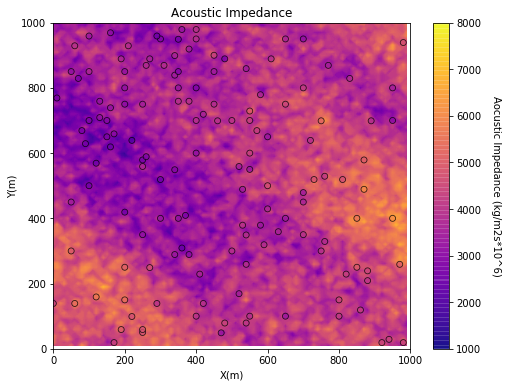

In [108]:
GSLIB.locpix(seismic,xmin,xmax,ymin,ymax,gcsize,AImin,AImax,df,'X','Y','AI','Acoustic Impedance','X(m)','Y(m)','Aocustic Impedance (kg/m2s*10^6)',cmap,'pixelplot_Acoustic_Impedance')

#### Other Ideas for Interogating Spatial Data

Looks good. There is so much more that we can do to display our spatial data to learn form it. For example, what if we want to separate low and high porosity?  Try this, make a new property in the DataFrame with 0 for low porosity and 1 for high porosity.

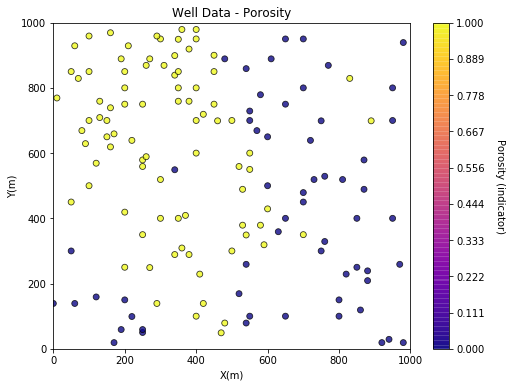

In [110]:
df['cat_por'] = np.where(df['Porosity']>=0.18, '1', '0')

GSLIB.locmap(df,'X','Y','cat_por',xmin,xmax,ymin,ymax,0.0,1.0,'Well Data - Porosity','X(m)','Y(m)','Porosity (indicator)',cmap,'locmap_cat_Porosity')


#### Comments

This was a basic demonstration of visualizing data. Much more could be done, I have other demosntrations on basics of working with DataFrames, ndarrays and many other workflows availble at https://github.com/GeostatsGuy/PythonNumericalDemos and https://github.com/GeostatsGuy/GeostatsPy.

I hope this was helpful,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
